In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names_test =['id', 'comment_text']
df_test = pd.read_csv('test.csv',header=None,sep=",",names=names_test, encoding = "ISO-8859-1")

In [3]:
df_test = df_test.drop(['id'], axis=1)
df_test.drop(df_test.index[:1], inplace=True)

In [4]:
bad_words = []
negative_file = open("negative-words.txt", "r")
for line in negative_file:
    bad_words.append(line.strip("\n"))
negative_file.close()
profanity_file = open("profanity-words.txt", "r")
for line in profanity_file:
    if (line.strip("\n") not in bad_words):
        bad_words.append(line.strip("\n"))
profanity_file.close()
# print(bad_words)

In [5]:
data_test = df_test.values
X_test = []
for index in range(0, 15000):
    X_test.append(data_test[index][0])
cv = sklearn.feature_extraction.text.CountVectorizer(vocabulary=bad_words)
X_test_features = cv.fit_transform(X_test).toarray()

In [6]:
df_test_unsupervised = pd.DataFrame(X_test_features, columns=bad_words)
df_test_unsupervised.sum()

2-faced            0
2-faces            0
abnormal           2
abolish            0
abominable         0
abominably         0
abominate          0
abomination        2
abort              0
aborted            0
aborts             0
abrade             0
abrasive           1
abrupt             2
abruptly           1
abscond            0
absence           33
absent-minded      0
absentee           0
absurd            23
absurdity          4
absurdly           5
absurdness         0
abuse             67
abused             8
abuses             4
abusive           25
abysmal            0
abysmally          0
abyss              0
                ... 
titt               0
tittie5            0
tittiefucker       0
titties          626
tittyfuck          0
tittywank          0
titwank            0
tosser             1
turd               4
tw4t               0
twat              66
twathead           0
twatty             0
twunt              0
twunter            0
v14gra             0
v1gra        

In [ ]:
f = open("sums.csv", "w")
sums = []
for i in range(len(bad_words)):
    f.write(bad_words[i] + "," + str(df_test_unsupervised.sum()[i]) + "\n")
    sums.append(df_test_unsupervised.sum()[i])
f.close()
print("done")

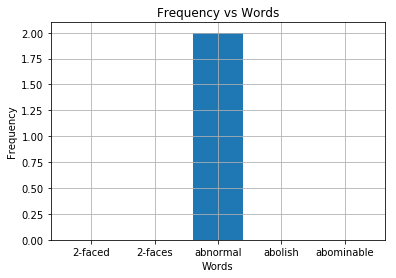

In [12]:
#plt.plot(bad_words[:5], sums[:5], ".")
plt.bar(bad_words[:5], sums[:5])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency vs Words")
plt.grid()

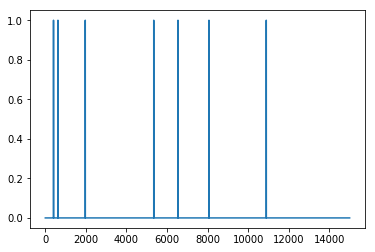

In [9]:
df_test_unsupervised[['willy']].sum(axis=1).plot()